In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('float_format', '{:f}'.format)

In [2]:
def get_cols(df: pd.DataFrame) -> tuple:
    numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
    categorical_columns = df.select_dtypes(exclude=np.number).columns.tolist()

    return numeric_columns, categorical_columns

# *balances*

In [24]:
df_balances = (
    pd.read_csv('../data/raw/balances.csv')
    # [['PERIODO','ID','CANT_EMP_NEG','CANT_EMP_CONS','CANT_EMP_HIPOT','SALDO_MED_EMP','SALDO_PEQ_EMP','SALDO_MIC_EMP','SALDO_CONS_REV','SALDO_CONS_NO_REV','SALDO_HIPOT','SALDO_VENCIDO']]
)
df_balances['PERIODO'] = df_balances['PERIODO'].astype(str)

"""
PERIODO - Periodo de extracción de los datos
ID - Identificador único

CANT_EMP_NEG - Cantidad de empresas de negocio
CANT_EMP_CONS - Cantidad de empresas de consumo
CANT_EMP_HIPOT - Cantidad de empresas hipotecario
    * last
    * variable para ver si cerro o abrio empresas en los ultimos 9 meses

SALDO_MED_EMP - Saldo en mediana empresa
SALDO_PEQ_EMP - Saldo en pequeña empresa
SALDO_MIC_EMP - Saldo en micro empresa
    * categorica para saber que tipo de empresa tiene
    * last
    * variacion promedio de los saldos en los saldos que tiene

SALDO_CONS_REV - Saldo Consumo revolvente
SALDO_CONS_NO_REV - Saldo Consumo NO revolvente
    
SALDO_HIPOT - Saldo en hipotecario
SALDO_VENCIDO - Saldo vencido

CANT_EMP_DOL_NEG - Cantidad de empresas de negocios en dólares
SALDO_DOLA_NEG - Saldo en dólares de negocio
CANT_EMP_DOL_CONS - Cantidad de empresas de consumo en dólares
SALDO_DOLA_CONS - Saldo en dólares de consumo
CANT_EMP_DOL_HIPOT - Cantidad de empresas de hipotecario en dólares
SALDO_DOLA_HIPOT - Saldo en dólares de hipotecario
MAX_LINEA_DISP_U6M - Línea Máxima disponible en los últimos 6 meses
"""
df_balances.dtypes


PERIODO                object
ID                     object
CANT_EMP_NEG            int64
CANT_EMP_CONS           int64
CANT_EMP_HIPOT          int64
SALDO_MED_EMP         float64
SALDO_PEQ_EMP         float64
SALDO_MIC_EMP         float64
SALDO_CONS_REV        float64
SALDO_CONS_NO_REV     float64
SALDO_HIPOT           float64
SALDO_VENCIDO         float64
CANT_EMP_DOL_NEG      float64
SALDO_DOLA_NEG        float64
CANT_EMP_DOL_CONS     float64
SALDO_DOLA_CONS       float64
CANT_EMP_DOL_HIPOT    float64
SALDO_DOLA_HIPOT      float64
MAX_LINEA_DISP_U6M    float64
dtype: object

In [25]:
df_balances.isna().sum()

PERIODO               0
ID                    0
CANT_EMP_NEG          0
CANT_EMP_CONS         0
CANT_EMP_HIPOT        0
SALDO_MED_EMP         0
SALDO_PEQ_EMP         0
SALDO_MIC_EMP         0
SALDO_CONS_REV        0
SALDO_CONS_NO_REV     0
SALDO_HIPOT           0
SALDO_VENCIDO         0
CANT_EMP_DOL_NEG      0
SALDO_DOLA_NEG        0
CANT_EMP_DOL_CONS     0
SALDO_DOLA_CONS       0
CANT_EMP_DOL_HIPOT    0
SALDO_DOLA_HIPOT      0
MAX_LINEA_DISP_U6M    0
dtype: int64

In [26]:
# features = df_balances.select_dtypes(include=np.float64).columns

# r = int(math.sqrt(len(features)))
# c = len(features)//r + 1

# it = 1
# plt.figure(figsize=(18, 6))
# plt.suptitle("Visualizing columns with NaN, before and after imputation")
# for i, col in list(enumerate(features)):
#     plt.subplot(r, c, it)
#     if df_balances[col].dtype=='object':
#         sns.countplot(x=df_balances[col])
#     else:
#         sns.kdeplot(df_balances[col], label='original', linewidth=2, color='blue', alpha=0.5)
#         # sns.kdeplot(df_balances_imputed[col], label='imputed', linestyle='--', linewidth=2, color='red', alpha=0.5)
#         plt.grid()
#         plt.legend()
#     it += 1
# plt.tight_layout()
# plt.show()

In [27]:
df_balances['SALDO_EMP_TOTAL'] = df_balances['SALDO_MED_EMP'] + df_balances['SALDO_PEQ_EMP'] + df_balances['SALDO_MIC_EMP'] + df_balances['SALDO_HIPOT']
df_balances['SALDO_EMP_TOTAL-VENCIDO'] = df_balances['SALDO_EMP_TOTAL'] - df_balances['SALDO_VENCIDO']
df_balances['SALDO_REV_NO_REV-VENCIDO'] = df_balances['SALDO_CONS_REV'] + df_balances['SALDO_CONS_NO_REV'] - df_balances['SALDO_VENCIDO']
df_balances['SALDO_TOTAL-VENCIDO'] = df_balances['SALDO_EMP_TOTAL'] + df_balances['SALDO_CONS_REV'] + df_balances['SALDO_CONS_NO_REV'] - df_balances['SALDO_VENCIDO']

# df_balances['PROXY_MOROSIDAD_1'] = df_balances['SALDO_VENCIDO'] / df_balances['SALDO_EMP_TOTAL']
# df_balances['PROXY_MOROSIDAD_2'] = df_balances['SALDO_VENCIDO'] / (df_balances['SALDO_EMP_TOTAL'] + df_balances['SALDO_CONS_REV'] + df_balances['SALDO_CONS_NO_REV'])
# df_balances['PROXY_MOROSIDAD_3'] = df_balances['SALDO_VENCIDO'] / (df_balances['SALDO_CONS_REV'] + df_balances['SALDO_CONS_NO_REV'])

In [28]:
df_balances.head(9*4)

,PERIODO,ID,CANT_EMP_NEG,CANT_EMP_CONS,CANT_EMP_HIPOT,SALDO_MED_EMP,SALDO_PEQ_EMP,SALDO_MIC_EMP,SALDO_CONS_REV,SALDO_CONS_NO_REV,SALDO_HIPOT,SALDO_VENCIDO,CANT_EMP_DOL_NEG,SALDO_DOLA_NEG,CANT_EMP_DOL_CONS,SALDO_DOLA_CONS,CANT_EMP_DOL_HIPOT,SALDO_DOLA_HIPOT,MAX_LINEA_DISP_U6M,SALDO_EMP_TOTAL,SALDO_EMP_TOTAL-VENCIDO,SALDO_REV_NO_REV-VENCIDO,SALDO_TOTAL-VENCIDO
0,202301,858130171a01415f93d40802fc9e192d,1,0,0,0.000000,0.000000,405.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.100000,405.000000,405.000000,0.000000,405.000000
1,202302,858130171a01415f93d40802fc9e192d,1,0,0,0.000000,0.000000,346.566600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.100000,346.566600,346.566600,0.000000,346.566600
2,202303,858130171a01415f93d40802fc9e192d,1,0,0,0.000000,0.000000,283.086900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.100000,283.086900,283.086900,0.000000,283.086900
3,202304,858130171a01415f93d40802fc9e192d,1,0,0,0.000000,0.000000,217.987200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.100000,217.987200,217.987200,0.000000,217.987200
4,202305,858130171a01415f93d40802fc9e192d,1,0,0,0.000000,0.000000,148.942800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.100000,148.942800,148.942800,0.000000,148.942800
5,202306,858130171a01415f93d40802fc9e192d,1,0,0,0.000000,0.000000,76.512600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.100000,76.512600,76.512600,0.000000,76.512600
6,202307,858130171a01415f93d40802fc9e192d,1,1,0,0.000000,0.000000,1215.000000,0.000000,1826.041500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.100000,1215.000000,1215.000000,1826.041500,3041.041500
7,202308,858130171a01415f93d40802fc9e192d,1,1,0,0.000000,0.000000,1038.573900,0.000000,1826.041500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.100000,1038.573900,1038.573900,1826.041500,2864.615400
8,202309,858130171a01415f93d40802fc9e192d,1,1,0,0.000000,0.000000,852.508800,0.000000,1620.550100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.100000,852.508800,852.508800,1620.550100,2473.058900
9,202301,26b25bfb3c114bf89e4112eb21b1c553,1,0,0,0.000000,0.000000,2459.897100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2459.897100,2459.897100,0.000000,2459.897100


In [29]:
# 'SALDO_EMP_TOTAL', 'SALDO_PEQ_EMP', 'SALDO_MED_EMP', 'SALDO_MIC_EMP', 'SALDO_CONS_REV', 'SALDO_CONS_NO_REV', 'SALDO_HIPOT', 'SALDO_VENCIDO'

for col in ['SALDO_EMP_TOTAL', 'SALDO_EMP_TOTAL-VENCIDO', 'SALDO_REV_NO_REV-VENCIDO', 'SALDO_TOTAL-VENCIDO']:
    print(col)
    df_balances[f'VAR_{col}_1'] = df_balances.groupby('ID')[f'{col}'].transform(lambda x: x.pct_change(periods=1))
    df_balances[f'VAR_{col}_MA3'] = df_balances.groupby('ID')[f'{col}'].transform(lambda x: x.pct_change(periods=1).rolling(window=3).mean())
    # df_balances[f'VAR_{col}_MA6'] = df_balances.groupby('ID')[f'{col}'].transform(lambda x: x.pct_change(periods=1).rolling(window=6).mean())
    df_balances[f'VAR_{col}_MA8'] = df_balances.groupby('ID')[f'{col}'].transform(lambda x: x.pct_change(periods=1).rolling(window=8).mean())

    df_balances[f'DIFF_{col}_1'] = df_balances.groupby('ID')[f'{col}'].transform(lambda x: x.diff(periods=1))
    df_balances[f'DIFF_{col}_MA3'] = df_balances.groupby('ID')[f'{col}'].transform(lambda x: x.diff(periods=1).rolling(window=3).mean())
    # df_balances[f'DIFF_{col}_MA6'] = df_balances.groupby('ID')[f'{col}'].transform(lambda x: x.diff(periods=1).rolling(window=6).mean())
    df_balances[f'DIFF_{col}_MA8'] = df_balances.groupby('ID')[f'{col}'].transform(lambda x: x.diff(periods=1).rolling(window=8).mean())
    
for col in ['SALDO_PEQ_EMP', 'SALDO_MED_EMP', 'SALDO_MIC_EMP'] + ['CANT_EMP_NEG', 'CANT_EMP_CONS', 'CANT_EMP_HIPOT']:
    print(col)
    df_balances[f'{col}_FLAG'] = df_balances[f'{col}'].apply(lambda x: True if x != 0 else False)

df_balances.head(9*4)

SALDO_EMP_TOTAL
SALDO_EMP_TOTAL-VENCIDO
SALDO_REV_NO_REV-VENCIDO
SALDO_TOTAL-VENCIDO
SALDO_PEQ_EMP
SALDO_MED_EMP
SALDO_MIC_EMP
CANT_EMP_NEG
CANT_EMP_CONS
CANT_EMP_HIPOT


,PERIODO,ID,CANT_EMP_NEG,CANT_EMP_CONS,CANT_EMP_HIPOT,SALDO_MED_EMP,SALDO_PEQ_EMP,SALDO_MIC_EMP,SALDO_CONS_REV,SALDO_CONS_NO_REV,SALDO_HIPOT,SALDO_VENCIDO,CANT_EMP_DOL_NEG,SALDO_DOLA_NEG,CANT_EMP_DOL_CONS,SALDO_DOLA_CONS,CANT_EMP_DOL_HIPOT,SALDO_DOLA_HIPOT,MAX_LINEA_DISP_U6M,SALDO_EMP_TOTAL,SALDO_EMP_TOTAL-VENCIDO,SALDO_REV_NO_REV-VENCIDO,SALDO_TOTAL-VENCIDO,VAR_SALDO_EMP_TOTAL_1,VAR_SALDO_EMP_TOTAL_MA3,VAR_SALDO_EMP_TOTAL_MA8,DIFF_SALDO_EMP_TOTAL_1,DIFF_SALDO_EMP_TOTAL_MA3,DIFF_SALDO_EMP_TOTAL_MA8,VAR_SALDO_EMP_TOTAL-VENCIDO_1,VAR_SALDO_EMP_TOTAL-VENCIDO_MA3,VAR_SALDO_EMP_TOTAL-VENCIDO_MA8,DIFF_SALDO_EMP_TOTAL-VENCIDO_1,DIFF_SALDO_EMP_TOTAL-VENCIDO_MA3,DIFF_SALDO_EMP_TOTAL-VENCIDO_MA8,VAR_SALDO_REV_NO_REV-VENCIDO_1,VAR_SALDO_REV_NO_REV-VENCIDO_MA3,VAR_SALDO_REV_NO_REV-VENCIDO_MA8,DIFF_SALDO_REV_NO_REV-VENCIDO_1,DIFF_SALDO_REV_NO_REV-VENCIDO_MA3,DIFF_SALDO_REV_NO_REV-VENCIDO_MA8,VAR_SALDO_TOTAL-VENCIDO_1,VAR_SALDO_TOTAL-VENCIDO_MA3,VAR_SALDO_TOTAL-VENCIDO_MA8,DIFF_SALDO_TOTAL-VENCIDO_1,DIFF_SALDO_TOTAL-VENCIDO_MA3,DIFF_SALDO_TOTAL-VENCIDO_MA8,SALDO_PEQ_EMP_FLAG,SALDO_MED_EMP_FLAG,SALDO_MIC_EMP_FLAG,CANT_EMP_NEG_FLAG,CANT_EMP_CONS_FLAG,CANT_EMP_HIPOT_FLAG
0,202301,858130171a01415f93d40802fc9e192d,1,0,0,0.000000,0.000000,405.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.100000,405.000000,405.000000,0.000000,405.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,True,True,False,False
1,202302,858130171a01415f93d40802fc9e192d,1,0,0,0.000000,0.000000,346.566600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.100000,346.566600,346.566600,0.000000,346.566600,-0.144280,NaN,NaN,-58.433400,NaN,NaN,-0.144280,NaN,NaN,-58.433400,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,-0.144280,NaN,NaN,-58.433400,NaN,NaN,False,False,True,True,False,False
2,202303,858130171a01415f93d40802fc9e192d,1,0,0,0.000000,0.000000,283.086900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.100000,283.086900,283.086900,0.000000,283.086900,-0.183167,NaN,NaN,-63.479700,NaN,NaN,-0.183167,NaN,NaN,-63.479700,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,-0.183167,NaN,NaN,-63.479700,NaN,NaN,False,False,True,True,False,False
3,202304,858130171a01415f93d40802fc9e192d,1,0,0,0.000000,0.000000,217.987200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.100000,217.987200,217.987200,0.000000,217.987200,-0.229964,-0.185804,NaN,-65.099700,-62.337600,NaN,-0.229964,-0.185804,NaN,-65.099700,-62.337600,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,-0.229964,-0.185804,NaN,-65.099700,-62.337600,NaN,False,False,True,True,False,False
4,202305,858130171a01415f93d40802fc9e192d,1,0,0,0.000000,0.000000,148.942800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.100000,148.942800,148.942800,0.000000,148.942800,-0.316736,-0.243289,NaN,-69.044400,-65.874600,NaN,-0.316736,-0.243289,NaN,-69.044400,-65.874600,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,-0.316736,-0.243289,NaN,-69.044400,-65.874600,NaN,False,False,True,True,False,False
5,202306,858130171a01415f93d40802fc9e192d,1,0,0,0.000000,0.000000,76.512600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.100000,76.512600,76.512600,0.000000,76.512600,-0.486295,-0.344332,NaN,-72.430200,-68.858100,NaN,-0.486295,-0.344332,NaN,-72.430200,-68.858100,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,-0.486295,-0.344332,NaN,-72.430200,-68.858100,NaN,False,False,True,True,False,False
6,202307,858130171a01415f93d40802fc9e192d,1,1,0,0.000000,0.000000,1215.000000,0.000000,1826.041500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.100000,1215.000000,1215.000000,1826.041500,3041.041500,14.879737,4.692235,NaN,1138.487400,332.337600,NaN,14.879737,4.692235,NaN,1138.487400,332.337600,NaN,inf,NaN,NaN,1826.041500,608.680500,NaN,38.745630,12.647533,NaN,

In [30]:
df_balances.to_parquet('../data/processed/balances.gzip', compression='gzip')

In [31]:

# df_balances['CANT_EMP_TOTAL'] = df_balances['CANT_EMP_NEG'] + df_balances['CANT_EMP_CONS'] + df_balances['CANT_EMP_HIPOT']    # ? las empresas son excluyentes?

In [32]:
# df_balances.head(50)

In [33]:
# list(df_balances['ID'].unique())

In [34]:
df_balances.describe()

,CANT_EMP_NEG,CANT_EMP_CONS,CANT_EMP_HIPOT,SALDO_MED_EMP,SALDO_PEQ_EMP,SALDO_MIC_EMP,SALDO_CONS_REV,SALDO_CONS_NO_REV,SALDO_HIPOT,SALDO_VENCIDO,CANT_EMP_DOL_NEG,SALDO_DOLA_NEG,CANT_EMP_DOL_CONS,SALDO_DOLA_CONS,CANT_EMP_DOL_HIPOT,SALDO_DOLA_HIPOT,MAX_LINEA_DISP_U6M,SALDO_EMP_TOTAL,SALDO_EMP_TOTAL-VENCIDO,SALDO_REV_NO_REV-VENCIDO,SALDO_TOTAL-VENCIDO,VAR_SALDO_EMP_TOTAL_1,VAR_SALDO_EMP_TOTAL_MA3,VAR_SALDO_EMP_TOTAL_MA8,DIFF_SALDO_EMP_TOTAL_1,DIFF_SALDO_EMP_TOTAL_MA3,DIFF_SALDO_EMP_TOTAL_MA8,VAR_SALDO_EMP_TOTAL-VENCIDO_1,VAR_SALDO_EMP_TOTAL-VENCIDO_MA3,VAR_SALDO_EMP_TOTAL-VENCIDO_MA8,DIFF_SALDO_EMP_TOTAL-VENCIDO_1,DIFF_SALDO_EMP_TOTAL-VENCIDO_MA3,DIFF_SALDO_EMP_TOTAL-VENCIDO_MA8,VAR_SALDO_REV_NO_REV-VENCIDO_1,VAR_SALDO_REV_NO_REV-VENCIDO_MA3,VAR_SALDO_REV_NO_REV-VENCIDO_MA8,DIFF_SALDO_REV_NO_REV-VENCIDO_1,DIFF_SALDO_REV_NO_REV-VENCIDO_MA3,DIFF_SALDO_REV_NO_REV-VENCIDO_MA8,VAR_SALDO_TOTAL-VENCIDO_1,VAR_SALDO_TOTAL-VENCIDO_MA3,VAR_SALDO_TOTAL-VENCIDO_MA8,DIFF_SALDO_TOTAL-VENCIDO_1,DIFF_SALDO_TOTAL-VENCIDO_MA3,DIFF_SALDO_TOTAL-VENCIDO_MA8
count,1367748.000000,1367748.000000,1367748.000000,1367748.000000,1367748.000000,1367748.000000,1367748.000000,1367748.000000,1367748.000000,1367748.000000,1367748.000000,1367748.000000,1367748.000000,1367748.000000,1367748.000000,1367748.000000,1367748.000000,1367748.000000,1367748.000000,1367748.000000,1367748.000000,832602.000000,595127.000000,91575.000000,1215776.000000,911832.000000,151972.000000,932609.000000,667915.000000,105142.000000,1215776.000000,911832.000000,151972.000000,697964.000000,482558.000000,72466.000000,1215776.000000,911832.000000,151972.000000,1198077.000000,890991.000000,146976.000000,1215776.000000,911832.000000,151972.000000
mean,1.069871,0.831095,0.029990,1848.943869,12869.064804,3072.459439,1461.633086,5552.291428,4895.341877,1410.465558,0.000624,38.818284,0.055424,119.207098,0.001269,107.193847,10337.239314,22685.809989,21275.344432,5603.458957,28289.268946,NaN,-62.221888,0.408537,162.106459,136.723920,162.106459,NaN,-53.575398,1.970691,88.125911,52.949148,88.125911,NaN,12.019959,13.498347,-66.069532,-82.206192,-66.069532,NaN,-14.528934,18.719976,96.036927,54.517728,96.036927
std,0.854740,1.100287,0.173273,42530.593045,30843.252533,9974.915095,6819.182772,44361.234221,46980.698259,13822.061469,0.027819,7403.591377,0.269699,10299.289561,0.035972,5026.280230,34542.988741,70493.623749,71885.698026,47771.836003,87977.862932,NaN,44850.712487,11.294491,13215.365466,6919.333411,4009.935657,NaN,42347.434822,486.113016,16936.152161,8492.368232,4703.191973,NaN,1581.624745,1098.581749,17094.388831,10401.593442,4492.768274,NaN,37175.540675,3445.148606,23108.708687,13012.273394,6305.111702
min,0.000000,0.000000,0.000000,0.000000,-15450.708800,-913.226400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-15450.708800,-1116984.420000,-1859518.456700,-1112937.513500,-inf,-34545175.772895,-0.656694,-1853827.295900,-643748.978667,-241714.700700,-inf,-34545175.772895,-2577.614507,-3706880.573900,-1261433.404667,-317208.130500,-inf,-19928.972842,-7473.360306,-14113600.540000,-4810670.040000,-1353336.372500,-inf,-34545175.772895,-2577.614507,-14059732.061600,-4816878.340267,-1355740.035300
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2226.416400,-0.116755,-0.092797,-0.046500,-902.652975,-708.302342,-404.717813,-0.113496,-0.094945,-0.059157,-938.716800,-756.039292,-456.521466,-0.124558,-0.089578,-0.055675,-216.055650,-189.344750,-129.759744,-0.105139,-0.081592,-0.046283,-1264.832800,-1004.792625,-656.082084
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3543.575850,3353.302800,0.000000,9068.241000,-0.053351,-0.034656,0.007443,-139.554900,0.000000,0.000000,-0.046520,-0.030687,0.000000,-161.157600,0.

In [35]:
df_balances.loc[df_balances['ID'] == '5da41258ad18492ea3aac6cc6c1e7a32']

,PERIODO,ID,CANT_EMP_NEG,CANT_EMP_CONS,CANT_EMP_HIPOT,SALDO_MED_EMP,SALDO_PEQ_EMP,SALDO_MIC_EMP,SALDO_CONS_REV,SALDO_CONS_NO_REV,SALDO_HIPOT,SALDO_VENCIDO,CANT_EMP_DOL_NEG,SALDO_DOLA_NEG,CANT_EMP_DOL_CONS,SALDO_DOLA_CONS,CANT_EMP_DOL_HIPOT,SALDO_DOLA_HIPOT,MAX_LINEA_DISP_U6M,SALDO_EMP_TOTAL,SALDO_EMP_TOTAL-VENCIDO,SALDO_REV_NO_REV-VENCIDO,SALDO_TOTAL-VENCIDO,VAR_SALDO_EMP_TOTAL_1,VAR_SALDO_EMP_TOTAL_MA3,VAR_SALDO_EMP_TOTAL_MA8,DIFF_SALDO_EMP_TOTAL_1,DIFF_SALDO_EMP_TOTAL_MA3,DIFF_SALDO_EMP_TOTAL_MA8,VAR_SALDO_EMP_TOTAL-VENCIDO_1,VAR_SALDO_EMP_TOTAL-VENCIDO_MA3,VAR_SALDO_EMP_TOTAL-VENCIDO_MA8,DIFF_SALDO_EMP_TOTAL-VENCIDO_1,DIFF_SALDO_EMP_TOTAL-VENCIDO_MA3,DIFF_SALDO_EMP_TOTAL-VENCIDO_MA8,VAR_SALDO_REV_NO_REV-VENCIDO_1,VAR_SALDO_REV_NO_REV-VENCIDO_MA3,VAR_SALDO_REV_NO_REV-VENCIDO_MA8,DIFF_SALDO_REV_NO_REV-VENCIDO_1,DIFF_SALDO_REV_NO_REV-VENCIDO_MA3,DIFF_SALDO_REV_NO_REV-VENCIDO_MA8,VAR_SALDO_TOTAL-VENCIDO_1,VAR_SALDO_TOTAL-VENCIDO_MA3,VAR_SALDO_TOTAL-VENCIDO_MA8,DIFF_SALDO_TOTAL-VENCIDO_1,DIFF_SALDO_TOTAL-VENCIDO_MA3,DIFF_SALDO_TOTAL-VENCIDO_MA8,SALDO_PEQ_EMP_FLAG,SALDO_MED_EMP_FLAG,SALDO_MIC_EMP_FLAG,CANT_EMP_NEG_FLAG,CANT_EMP_CONS_FLAG,CANT_EMP_HIPOT_FLAG


In [36]:
df_balances.dtypes

PERIODO                               object
ID                                    object
CANT_EMP_NEG                           int64
CANT_EMP_CONS                          int64
CANT_EMP_HIPOT                         int64
SALDO_MED_EMP                        float64
SALDO_PEQ_EMP                        float64
SALDO_MIC_EMP                        float64
SALDO_CONS_REV                       float64
SALDO_CONS_NO_REV                    float64
SALDO_HIPOT                          float64
SALDO_VENCIDO                        float64
CANT_EMP_DOL_NEG                     float64
SALDO_DOLA_NEG                       float64
CANT_EMP_DOL_CONS                    float64
SALDO_DOLA_CONS                      float64
CANT_EMP_DOL_HIPOT                   float64
SALDO_DOLA_HIPOT                     float64
MAX_LINEA_DISP_U6M                   float64
SALDO_EMP_TOTAL                      float64
SALDO_EMP_TOTAL-VENCIDO              float64
SALDO_REV_NO_REV-VENCIDO             float64
SALDO_TOTA

In [37]:
df_balances.groupby('ID').agg({'PERIODO': 'unique'})

,PERIODO
ID,
00000ae64b2d4ea7b318f3caa49fb832,"[202301, 202302, 202303, 202304, 202305, 20230..."
00002e673be949b1afe485e71ff71048,"[202301, 202302, 202303, 202304, 202305, 20230..."
0000e7adc30c476ba07265c60676562c,"[202301, 202302, 202303, 202304, 202305, 20230..."
00014b0427554bbbad91e0d8aeab3118,"[202301, 202302, 202303, 202304, 202305, 20230..."
0001efa922ff405384514b5c6ed18294,"[202301, 202302, 202303, 202304, 202305, 20230..."
...,...
fffe81ac4d864cf5b21d80e1b39b6bde,"[202301, 202302, 202303, 202304, 202305, 20230..."
fffebeece7e3462c9ecd043d93bf8828,"[202301, 202302, 202303, 202304, 202305, 20230..."
ffff32ee7ea247bab950cfc94c7ba402,"[202301, 202302, 202303, 202304, 202305, 20230..."


In [39]:
plt.hist(df_balances['ID'].value_counts().reset_index())
plt.show()

In [ ]:
df_balances.isnull().sum() / len(df_balances)

In [ ]:
df_aux = df_balances.copy().replace(0, np.nan)
msno.matrix(df_aux, figsize=(10, 5))

In [3]:
df_balances = pd.read_parquet('../data/processed/balances.gzip')
df_balances.head(9*3)

,PERIODO,ID,CANT_EMP_NEG,CANT_EMP_CONS,CANT_EMP_HIPOT,SALDO_MED_EMP,SALDO_PEQ_EMP,SALDO_MIC_EMP,SALDO_CONS_REV,SALDO_CONS_NO_REV,SALDO_HIPOT,SALDO_VENCIDO,CANT_EMP_DOL_NEG,SALDO_DOLA_NEG,CANT_EMP_DOL_CONS,SALDO_DOLA_CONS,CANT_EMP_DOL_HIPOT,SALDO_DOLA_HIPOT,MAX_LINEA_DISP_U6M,SALDO_EMP_TOTAL,SALDO_EMP_TOTAL-VENCIDO,SALDO_REV_NO_REV-VENCIDO,SALDO_TOTAL-VENCIDO,VAR_SALDO_EMP_TOTAL_1,VAR_SALDO_EMP_TOTAL_MA3,VAR_SALDO_EMP_TOTAL_MA8,DIFF_SALDO_EMP_TOTAL_1,DIFF_SALDO_EMP_TOTAL_MA3,DIFF_SALDO_EMP_TOTAL_MA8,VAR_SALDO_EMP_TOTAL-VENCIDO_1,VAR_SALDO_EMP_TOTAL-VENCIDO_MA3,VAR_SALDO_EMP_TOTAL-VENCIDO_MA8,DIFF_SALDO_EMP_TOTAL-VENCIDO_1,DIFF_SALDO_EMP_TOTAL-VENCIDO_MA3,DIFF_SALDO_EMP_TOTAL-VENCIDO_MA8,VAR_SALDO_REV_NO_REV-VENCIDO_1,VAR_SALDO_REV_NO_REV-VENCIDO_MA3,VAR_SALDO_REV_NO_REV-VENCIDO_MA8,DIFF_SALDO_REV_NO_REV-VENCIDO_1,DIFF_SALDO_REV_NO_REV-VENCIDO_MA3,DIFF_SALDO_REV_NO_REV-VENCIDO_MA8,VAR_SALDO_TOTAL-VENCIDO_1,VAR_SALDO_TOTAL-VENCIDO_MA3,VAR_SALDO_TOTAL-VENCIDO_MA8,DIFF_SALDO_TOTAL-VENCIDO_1,DIFF_SALDO_TOTAL-VENCIDO_MA3,DIFF_SALDO_TOTAL-VENCIDO_MA8,SALDO_PEQ_EMP_FLAG,SALDO_MED_EMP_FLAG,SALDO_MIC_EMP_FLAG,CANT_EMP_NEG_FLAG,CANT_EMP_CONS_FLAG,CANT_EMP_HIPOT_FLAG
0,202301,858130171a01415f93d40802fc9e192d,1,0,0,0.000000,0.000000,405.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.100000,405.000000,405.000000,0.000000,405.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,True,True,False,False
1,202302,858130171a01415f93d40802fc9e192d,1,0,0,0.000000,0.000000,346.566600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.100000,346.566600,346.566600,0.000000,346.566600,-0.144280,NaN,NaN,-58.433400,NaN,NaN,-0.144280,NaN,NaN,-58.433400,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,-0.144280,NaN,NaN,-58.433400,NaN,NaN,False,False,True,True,False,False
2,202303,858130171a01415f93d40802fc9e192d,1,0,0,0.000000,0.000000,283.086900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.100000,283.086900,283.086900,0.000000,283.086900,-0.183167,NaN,NaN,-63.479700,NaN,NaN,-0.183167,NaN,NaN,-63.479700,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,-0.183167,NaN,NaN,-63.479700,NaN,NaN,False,False,True,True,False,False
3,202304,858130171a01415f93d40802fc9e192d,1,0,0,0.000000,0.000000,217.987200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.100000,217.987200,217.987200,0.000000,217.987200,-0.229964,-0.185804,NaN,-65.099700,-62.337600,NaN,-0.229964,-0.185804,NaN,-65.099700,-62.337600,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,-0.229964,-0.185804,NaN,-65.099700,-62.337600,NaN,False,False,True,True,False,False
4,202305,858130171a01415f93d40802fc9e192d,1,0,0,0.000000,0.000000,148.942800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.100000,148.942800,148.942800,0.000000,148.942800,-0.316736,-0.243289,NaN,-69.044400,-65.874600,NaN,-0.316736,-0.243289,NaN,-69.044400,-65.874600,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,-0.316736,-0.243289,NaN,-69.044400,-65.874600,NaN,False,False,True,True,False,False
5,202306,858130171a01415f93d40802fc9e192d,1,0,0,0.000000,0.000000,76.512600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.100000,76.512600,76.512600,0.000000,76.512600,-0.486295,-0.344332,NaN,-72.430200,-68.858100,NaN,-0.486295,-0.344332,NaN,-72.430200,-68.858100,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,-0.486295,-0.344332,NaN,-72.430200,-68.858100,NaN,False,False,True,True,False,False
6,202307,858130171a01415f93d40802fc9e192d,1,1,0,0.000000,0.000000,1215.000000,0.000000,1826.041500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.100000,1215.000000,1215.000000,1826.041500,3041.041500,14.879737,4.692235,NaN,1138.487400,332.337600,NaN,14.879737,4.692235,NaN,1138.487400,332.337600,NaN,inf,NaN,NaN,1826.041500,608.680500,NaN,38.745630,12.647533,NaN,

In [4]:
df_balances.columns

Index(['PERIODO', 'ID', 'CANT_EMP_NEG', 'CANT_EMP_CONS', 'CANT_EMP_HIPOT',
       'SALDO_MED_EMP', 'SALDO_PEQ_EMP', 'SALDO_MIC_EMP', 'SALDO_CONS_REV',
       'SALDO_CONS_NO_REV', 'SALDO_HIPOT', 'SALDO_VENCIDO', 'CANT_EMP_DOL_NEG',
       'SALDO_DOLA_NEG', 'CANT_EMP_DOL_CONS', 'SALDO_DOLA_CONS',
       'CANT_EMP_DOL_HIPOT', 'SALDO_DOLA_HIPOT', 'MAX_LINEA_DISP_U6M',
       'SALDO_EMP_TOTAL', 'SALDO_EMP_TOTAL-VENCIDO',
       'SALDO_REV_NO_REV-VENCIDO', 'SALDO_TOTAL-VENCIDO',
       'VAR_SALDO_EMP_TOTAL_1', 'VAR_SALDO_EMP_TOTAL_MA3',
       'VAR_SALDO_EMP_TOTAL_MA8', 'DIFF_SALDO_EMP_TOTAL_1',
       'DIFF_SALDO_EMP_TOTAL_MA3', 'DIFF_SALDO_EMP_TOTAL_MA8',
       'VAR_SALDO_EMP_TOTAL-VENCIDO_1', 'VAR_SALDO_EMP_TOTAL-VENCIDO_MA3',
       'VAR_SALDO_EMP_TOTAL-VENCIDO_MA8', 'DIFF_SALDO_EMP_TOTAL-VENCIDO_1',
       'DIFF_SALDO_EMP_TOTAL-VENCIDO_MA3', 'DIFF_SALDO_EMP_TOTAL-VENCIDO_MA8',
       'VAR_SALDO_REV_NO_REV-VENCIDO_1', 'VAR_SALDO_REV_NO_REV-VENCIDO_MA3',
       'VAR_SALDO_REV_NO_REV-VENC

In [5]:
df_balances_unirow = df_balances.groupby('ID').agg(
    {
        'CANT_EMP_NEG': ['max', 'last', 'min'],
        'CANT_EMP_CONS': ['max', 'last', 'min'],
        'CANT_EMP_HIPOT': ['max', 'last', 'min'],
        
        'SALDO_MED_EMP' : ['mean', 'median', 'last', 'min', 'max', 'first'],
        'SALDO_PEQ_EMP' : ['mean', 'median', 'last', 'min', 'max', 'first'],
        'SALDO_MIC_EMP' : ['mean', 'median', 'last', 'min', 'max', 'first'],
        'SALDO_CONS_REV' : ['mean', 'median', 'last', 'min', 'max', 'first'],
        'SALDO_CONS_NO_REV' : ['mean', 'median', 'last', 'min', 'max', 'first'],
        'SALDO_HIPOT' : ['mean', 'median', 'last', 'min', 'max', 'first'],
        'SALDO_VENCIDO' : ['mean', 'median', 'last', 'min', 'max', 'first'],

        'CANT_EMP_DOL_NEG' : ['mean', 'median', 'last', 'min', 'max', 'first'],
        'SALDO_DOLA_NEG' : ['mean', 'median', 'last', 'min', 'max', 'first'],
        'CANT_EMP_DOL_CONS' : ['mean', 'median', 'last', 'min', 'max', 'first'],
        'SALDO_DOLA_CONS' : ['mean', 'median', 'last', 'min', 'max', 'first'],
        'CANT_EMP_DOL_HIPOT' : ['mean', 'median', 'last', 'min', 'max', 'first'],
        'SALDO_DOLA_HIPOT' : ['mean', 'median', 'last', 'min', 'max', 'first'],
        'MAX_LINEA_DISP_U6M' : ['mean', 'median', 'last', 'min', 'max', 'first'],

        'SALDO_EMP_TOTAL': ['mean', 'last', 'max', 'min', 'median'],
        
        'VAR_SALDO_EMP_TOTAL_1' : ['mean', 'median'], 
        'VAR_SALDO_EMP_TOTAL_MA3' : ['mean', 'median'], 
        # 'VAR_SALDO_EMP_TOTAL_MA6' : ['mean', 'median'],
        'VAR_SALDO_EMP_TOTAL_MA8' : ['mean', 'median'], 
        
        'VAR_SALDO_EMP_TOTAL-VENCIDO_1' : ['mean', 'median'],
        'VAR_SALDO_EMP_TOTAL-VENCIDO_MA3' : ['mean', 'median'],
        # 'VAR_SALDO_EMP_TOTAL-VENCIDO_MA6' : ['mean', 'median'],
        'VAR_SALDO_EMP_TOTAL-VENCIDO_MA8' : ['mean', 'median'],
        
        'DIFF_SALDO_EMP_TOTAL_1' : ['mean', 'median'],
        'DIFF_SALDO_EMP_TOTAL_MA3' : ['mean', 'median'],
        # 'DIFF_SALDO_EMP_TOTAL_MA6' : ['mean', 'median'],
        'DIFF_SALDO_EMP_TOTAL_MA8' : ['mean', 'median'],

        'DIFF_SALDO_EMP_TOTAL-VENCIDO_1' : ['mean', 'median'],
        'DIFF_SALDO_EMP_TOTAL-VENCIDO_MA3' : ['mean', 'median'],
        # 'DIFF_SALDO_EMP_TOTAL-VENCIDO_MA6' : ['mean', 'median'],
        'DIFF_SALDO_EMP_TOTAL-VENCIDO_MA8' : ['mean', 'median'],

        'VAR_SALDO_REV_NO_REV-VENCIDO_1' : ['mean', 'median'],
        'VAR_SALDO_REV_NO_REV-VENCIDO_MA3' : ['mean', 'median'],
        # 'VAR_SALDO_REV_NO_REV-VENCIDO_MA6' : ['mean', 'median'],
        'VAR_SALDO_REV_NO_REV-VENCIDO_MA8' : ['mean', 'median'],

        'VAR_SALDO_TOTAL-VENCIDO_1' : ['mean', 'median'],
        'VAR_SALDO_TOTAL-VENCIDO_MA3' : ['mean', 'median'],
        # 'VAR_SALDO_TOTAL-VENCIDO_MA6' : ['mean', 'median'],
        'VAR_SALDO_TOTAL-VENCIDO_MA8' : ['mean', 'median'],

        # 'SALDO_PEQ_EMP_FLAG' : ['any'],
        # 'SALDO_MED_EMP_FLAG' : ['any'],
        # 'SALDO_MIC_EMP_FLAG' : ['any'],
        # 'CANT_EMP_NEG_FLAG' : ['any'],
        # 'CANT_EMP_CONS_FLAG' : ['any'],
        # 'CANT_EMP_HIPOT_FLAG' : ['any'],
    }
).replace([np.inf, -np.inf], np.nan).fillna(0)

df_balances_unirow.columns = ['_'.join(col) for col in df_balances_unirow.columns.values]
df_balances_unirow = df_balances_unirow.reset_index()

df_balances_unirow

,ID,CANT_EMP_NEG_max,CANT_EMP_NEG_last,CANT_EMP_NEG_min,CANT_EMP_CONS_max,CANT_EMP_CONS_last,CANT_EMP_CONS_min,CANT_EMP_HIPOT_max,CANT_EMP_HIPOT_last,CANT_EMP_HIPOT_min,SALDO_MED_EMP_mean,SALDO_MED_EMP_median,SALDO_MED_EMP_last,SALDO_MED_EMP_min,SALDO_MED_EMP_max,SALDO_MED_EMP_first,SALDO_PEQ_EMP_mean,SALDO_PEQ_EMP_median,SALDO_PEQ_EMP_last,SALDO_PEQ_EMP_min,SALDO_PEQ_EMP_max,SALDO_PEQ_EMP_first,SALDO_MIC_EMP_mean,SALDO_MIC_EMP_median,SALDO_MIC_EMP_last,SALDO_MIC_EMP_min,SALDO_MIC_EMP_max,SALDO_MIC_EMP_first,SALDO_CONS_REV_mean,SALDO_CONS_REV_median,SALDO_CONS_REV_last,SALDO_CONS_REV_min,SALDO_CONS_REV_max,SALDO_CONS_REV_first,SALDO_CONS_NO_REV_mean,SALDO_CONS_NO_REV_median,SALDO_CONS_NO_REV_last,SALDO_CONS_NO_REV_min,SALDO_CONS_NO_REV_max,SALDO_CONS_NO_REV_first,SALDO_HIPOT_mean,SALDO_HIPOT_median,SALDO_HIPOT_last,SALDO_HIPOT_min,SALDO_HIPOT_max,SALDO_HIPOT_first,SALDO_VENCIDO_mean,SALDO_VENCIDO_median,SALDO_VENCIDO_last,SALDO_VENCIDO_min,SALDO_VENCIDO_max,SALDO_VENCIDO_first,CANT_EMP_DOL_NEG_mean,CANT_EMP_DOL_NEG_median,CANT_EMP_DOL_NEG_last,CANT_EMP_DOL_NEG_min,CANT_EMP_DOL_NEG_max,CANT_EMP_DOL_NEG_first,SALDO_DOLA_NEG_mean,SALDO_DOLA_NEG_median,SALDO_DOLA_NEG_last,SALDO_DOLA_NEG_min,SALDO_DOLA_NEG_max,SALDO_DOLA_NEG_first,CANT_EMP_DOL_CONS_mean,CANT_EMP_DOL_CONS_median,CANT_EMP_DOL_CONS_last,CANT_EMP_DOL_CONS_min,CANT_EMP_DOL_CONS_max,CANT_EMP_DOL_CONS_first,SALDO_DOLA_CONS_mean,SALDO_DOLA_CONS_median,SALDO_DOLA_CONS_last,SALDO_DOLA_CONS_min,SALDO_DOLA_CONS_max,SALDO_DOLA_CONS_first,CANT_EMP_DOL_HIPOT_mean,CANT_EMP_DOL_HIPOT_median,CANT_EMP_DOL_HIPOT_last,CANT_EMP_DOL_HIPOT_min,CANT_EMP_DOL_HIPOT_max,CANT_EMP_DOL_HIPOT_first,SALDO_DOLA_HIPOT_mean,SALDO_DOLA_HIPOT_median,SALDO_DOLA_HIPOT_last,SALDO_DOLA_HIPOT_min,SALDO_DOLA_HIPOT_max,SALDO_DOLA_HIPOT_first,MAX_LINEA_DISP_U6M_mean,MAX_LINEA_DISP_U6M_median,MAX_LINEA_DISP_U6M_last,MAX_LINEA_DISP_U6M_min,MAX_LINEA_DISP_U6M_max,MAX_LINEA_DISP_U6M_first,SALDO_EMP_TOTAL_mean,SALDO_EMP_TOTAL_last,SALDO_EMP_TOTAL_max,SALDO_EMP_TOTAL_min,SALDO_EMP_TOTAL_median,VAR_SALDO_EMP_TOTAL_1_mean,VAR_SALDO_EMP_TOTAL_1_median,VAR_SALDO_EMP_TOTAL_MA3_mean,VAR_SALDO_EMP_TOTAL_MA3_median,VAR_SALDO_EMP_TOTAL_MA8_mean,VAR_SALDO_EMP_TOTAL_MA8_median,VAR_SALDO_EMP_TOTAL-VENCIDO_1_mean,VAR_SALDO_EMP_TOTAL-VENCIDO_1_median,VAR_SALDO_EMP_TOTAL-VENCIDO_MA3_mean,VAR_SALDO_EMP_TOTAL-VENCIDO_MA3_median,VAR_SALDO_EMP_TOTAL-VENCIDO_MA8_mean,VAR_SALDO_EMP_TOTAL-VENCIDO_MA8_median,DIFF_SALDO_EMP_TOTAL_1_mean,DIFF_SALDO_EMP_TOTAL_1_median,DIFF_SALDO_EMP_TOTAL_MA3_mean,DIFF_SALDO_EMP_TOTAL_MA3_median,DIFF_SALDO_EMP_TOTAL_MA8_mean,DIFF_SALDO_EMP_TOTAL_MA8_median,DIFF_SALDO_EMP_TOTAL-VENCIDO_1_mean,DIFF_SALDO_EMP_TOTAL-VENCIDO_1_median,DIFF_SALDO_EMP_TOTAL-VENCIDO_MA3_mean,DIFF_SALDO_EMP_TOTAL-VENCIDO_MA3_median,DIFF_SALDO_EMP_TOTAL-VENCIDO_MA8_mean,DIFF_SALDO_EMP_TOTAL-VENCIDO_MA8_median,VAR_SALDO_REV_NO_REV-VENCIDO_1_mean,VAR_SALDO_REV_NO_REV-VENCIDO_1_median,VAR_SALDO_REV_NO_REV-VENCIDO_MA3_mean,VAR_SALDO_REV_NO_REV-VENCIDO_MA3_median,VAR_SALDO_REV_NO_REV-VENCIDO_MA8_mean,VAR_SALDO_REV_NO_REV-VENCIDO_MA8_median,VAR_SALDO_TOTAL-VENCIDO_1_mean,VAR_SALDO_TOTAL-VENCIDO_1_median,VAR_SALDO_TOTAL-VENCIDO_MA3_mean,VAR_SALDO_TOTAL-VENCIDO_MA3_median,VAR_SALDO_TOTAL-VENCIDO_MA8_mean,VAR_SALDO_TOTAL-VENCIDO_MA8_median
0,00000ae64b2d4ea7b318f3caa49fb832,1,1,1,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26052.711556,25834.968000,23286.846500,23286.846500,28983.036500,28983.036500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.

In [6]:
# plt.boxplot(df_balances_unirow['VAR_SALDO_TOTAL-VENCIDO_MA6_median'])

In [7]:
nc, cc = get_cols(df_balances_unirow)
df_balances_unirow[nc].std(numeric_only=True).reset_index().sort_values(by=0, ascending=False)

,index,0
95,SALDO_EMP_TOTAL_max,80173.564228
94,SALDO_EMP_TOTAL_last,70848.901986
97,SALDO_EMP_TOTAL_median,69892.524226
93,SALDO_EMP_TOTAL_mean,69015.638912
96,SALDO_EMP_TOTAL_min,60878.987456
...,...,...
56,CANT_EMP_DOL_NEG_first,0.027976
53,CANT_EMP_DOL_NEG_last,0.027020
52,CANT_EMP_DOL_NEG_median,0.026652
51,CANT_EMP_DOL_NEG_mean,0.025295


In [8]:

# corr_mat = df_balances_unirow[nc].corr(method='spearman')
# mask = np.tril(np.ones_like(corr_mat, dtype=bool))  # create a mask to hide the lower triangle of the heatmap
# plt.figure(figsize=(40, 40))
# sns.heatmap(corr_mat, annot=True, cmap='coolwarm', vmin=-1, vmax=1, square=True, fmt='.2f', mask=mask)  # add the mask to the heatmap
# plt.title('Imputed Correlation Matrix')
# plt.show()

In [9]:
df_balances_unirow

,ID,CANT_EMP_NEG_max,CANT_EMP_NEG_last,CANT_EMP_NEG_min,CANT_EMP_CONS_max,CANT_EMP_CONS_last,CANT_EMP_CONS_min,CANT_EMP_HIPOT_max,CANT_EMP_HIPOT_last,CANT_EMP_HIPOT_min,SALDO_MED_EMP_mean,SALDO_MED_EMP_median,SALDO_MED_EMP_last,SALDO_MED_EMP_min,SALDO_MED_EMP_max,SALDO_MED_EMP_first,SALDO_PEQ_EMP_mean,SALDO_PEQ_EMP_median,SALDO_PEQ_EMP_last,SALDO_PEQ_EMP_min,SALDO_PEQ_EMP_max,SALDO_PEQ_EMP_first,SALDO_MIC_EMP_mean,SALDO_MIC_EMP_median,SALDO_MIC_EMP_last,SALDO_MIC_EMP_min,SALDO_MIC_EMP_max,SALDO_MIC_EMP_first,SALDO_CONS_REV_mean,SALDO_CONS_REV_median,SALDO_CONS_REV_last,SALDO_CONS_REV_min,SALDO_CONS_REV_max,SALDO_CONS_REV_first,SALDO_CONS_NO_REV_mean,SALDO_CONS_NO_REV_median,SALDO_CONS_NO_REV_last,SALDO_CONS_NO_REV_min,SALDO_CONS_NO_REV_max,SALDO_CONS_NO_REV_first,SALDO_HIPOT_mean,SALDO_HIPOT_median,SALDO_HIPOT_last,SALDO_HIPOT_min,SALDO_HIPOT_max,SALDO_HIPOT_first,SALDO_VENCIDO_mean,SALDO_VENCIDO_median,SALDO_VENCIDO_last,SALDO_VENCIDO_min,SALDO_VENCIDO_max,SALDO_VENCIDO_first,CANT_EMP_DOL_NEG_mean,CANT_EMP_DOL_NEG_median,CANT_EMP_DOL_NEG_last,CANT_EMP_DOL_NEG_min,CANT_EMP_DOL_NEG_max,CANT_EMP_DOL_NEG_first,SALDO_DOLA_NEG_mean,SALDO_DOLA_NEG_median,SALDO_DOLA_NEG_last,SALDO_DOLA_NEG_min,SALDO_DOLA_NEG_max,SALDO_DOLA_NEG_first,CANT_EMP_DOL_CONS_mean,CANT_EMP_DOL_CONS_median,CANT_EMP_DOL_CONS_last,CANT_EMP_DOL_CONS_min,CANT_EMP_DOL_CONS_max,CANT_EMP_DOL_CONS_first,SALDO_DOLA_CONS_mean,SALDO_DOLA_CONS_median,SALDO_DOLA_CONS_last,SALDO_DOLA_CONS_min,SALDO_DOLA_CONS_max,SALDO_DOLA_CONS_first,CANT_EMP_DOL_HIPOT_mean,CANT_EMP_DOL_HIPOT_median,CANT_EMP_DOL_HIPOT_last,CANT_EMP_DOL_HIPOT_min,CANT_EMP_DOL_HIPOT_max,CANT_EMP_DOL_HIPOT_first,SALDO_DOLA_HIPOT_mean,SALDO_DOLA_HIPOT_median,SALDO_DOLA_HIPOT_last,SALDO_DOLA_HIPOT_min,SALDO_DOLA_HIPOT_max,SALDO_DOLA_HIPOT_first,MAX_LINEA_DISP_U6M_mean,MAX_LINEA_DISP_U6M_median,MAX_LINEA_DISP_U6M_last,MAX_LINEA_DISP_U6M_min,MAX_LINEA_DISP_U6M_max,MAX_LINEA_DISP_U6M_first,SALDO_EMP_TOTAL_mean,SALDO_EMP_TOTAL_last,SALDO_EMP_TOTAL_max,SALDO_EMP_TOTAL_min,SALDO_EMP_TOTAL_median,VAR_SALDO_EMP_TOTAL_1_mean,VAR_SALDO_EMP_TOTAL_1_median,VAR_SALDO_EMP_TOTAL_MA3_mean,VAR_SALDO_EMP_TOTAL_MA3_median,VAR_SALDO_EMP_TOTAL_MA8_mean,VAR_SALDO_EMP_TOTAL_MA8_median,VAR_SALDO_EMP_TOTAL-VENCIDO_1_mean,VAR_SALDO_EMP_TOTAL-VENCIDO_1_median,VAR_SALDO_EMP_TOTAL-VENCIDO_MA3_mean,VAR_SALDO_EMP_TOTAL-VENCIDO_MA3_median,VAR_SALDO_EMP_TOTAL-VENCIDO_MA8_mean,VAR_SALDO_EMP_TOTAL-VENCIDO_MA8_median,DIFF_SALDO_EMP_TOTAL_1_mean,DIFF_SALDO_EMP_TOTAL_1_median,DIFF_SALDO_EMP_TOTAL_MA3_mean,DIFF_SALDO_EMP_TOTAL_MA3_median,DIFF_SALDO_EMP_TOTAL_MA8_mean,DIFF_SALDO_EMP_TOTAL_MA8_median,DIFF_SALDO_EMP_TOTAL-VENCIDO_1_mean,DIFF_SALDO_EMP_TOTAL-VENCIDO_1_median,DIFF_SALDO_EMP_TOTAL-VENCIDO_MA3_mean,DIFF_SALDO_EMP_TOTAL-VENCIDO_MA3_median,DIFF_SALDO_EMP_TOTAL-VENCIDO_MA8_mean,DIFF_SALDO_EMP_TOTAL-VENCIDO_MA8_median,VAR_SALDO_REV_NO_REV-VENCIDO_1_mean,VAR_SALDO_REV_NO_REV-VENCIDO_1_median,VAR_SALDO_REV_NO_REV-VENCIDO_MA3_mean,VAR_SALDO_REV_NO_REV-VENCIDO_MA3_median,VAR_SALDO_REV_NO_REV-VENCIDO_MA8_mean,VAR_SALDO_REV_NO_REV-VENCIDO_MA8_median,VAR_SALDO_TOTAL-VENCIDO_1_mean,VAR_SALDO_TOTAL-VENCIDO_1_median,VAR_SALDO_TOTAL-VENCIDO_MA3_mean,VAR_SALDO_TOTAL-VENCIDO_MA3_median,VAR_SALDO_TOTAL-VENCIDO_MA8_mean,VAR_SALDO_TOTAL-VENCIDO_MA8_median
0,00000ae64b2d4ea7b318f3caa49fb832,1,1,1,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26052.711556,25834.968000,23286.846500,23286.846500,28983.036500,28983.036500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.

# *customers*

In [10]:
df_customers = (
    pd.read_csv('../data/raw/customers.csv')
    .assign(
        PER_BANCARIZACION = lambda row: row['PER_BANCARIZACION'].astype(str)
    )
    .assign(
        ANIO_BANCARIZACION = lambda row: row['PER_BANCARIZACION'].str[:4],
        MES_BANCARIZACION = lambda row: row['PER_BANCARIZACION'].str[5:7]
    )
    .assign(
        ANIO_BANCARIZACION = lambda row: row['ANIO_BANCARIZACION'].astype(int),
        MES_BANCARIZACION = lambda row: row['MES_BANCARIZACION'].astype(int)
    )
    .drop(columns=['PER_BANCARIZACION', 'DE_CIIU', 'NO_PROVINCIA'])
)
df_customers['CO_TIPO_SEXO'] = df_customers['CO_TIPO_SEXO'].astype('category')

df_customers

,ID,CO_TIPO_SEXO,EDAD,NO_DEPARTAMENTO,ANIO_BANCARIZACION,MES_BANCARIZACION
0,8bd775237f2f4c7cae87c255e9e71d62,1,48.000000,CAJAMARCA,2013,7
1,2409b242893e4ea4b7e6af1292030666,3,NaN,NaN,2017,9
2,65edb7eb9d144b2184ef76ec2c35cdf8,1,38.000000,NaN,2008,2
3,2fef711096234036807b01a5a697a81c,1,61.000000,TACNA,2006,1
4,796443da390d409ba3e7b775fde576cd,3,29.000000,LAMBAYEQUE,2014,6
...,...,...,...,...,...,...
151967,54a73b9c515f46d19c0182e3f44f44fe,3,25.000000,NaN,2021,8
151968,1df55d6b6af544b58312d68241a10e4f,3,32.000000,LAMBAYEQUE,2018,9
151969,5dd4a95d877d4474a277173c6fe4d227,1,62.000000,NaN,2006,1
151970,cbad53becdb042cfb98a992566ec0e94,2,51.000000,NaN,2013,2


In [11]:
df_customers.isna().sum()

ID                        0
CO_TIPO_SEXO              0
EDAD                  25406
NO_DEPARTAMENTO       75744
ANIO_BANCARIZACION        0
MES_BANCARIZACION         0
dtype: int64

<Axes: xlabel='EDAD', ylabel='Density'>

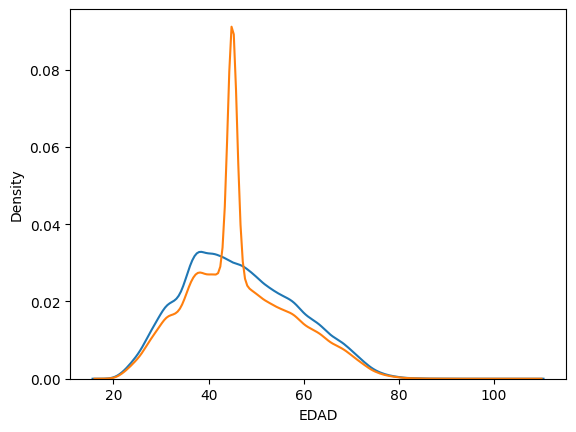

In [12]:
sns.kdeplot(df_customers['EDAD'])
sns.kdeplot(df_customers['EDAD'].fillna(df_customers['EDAD'].median()))

In [13]:
# # Fill NO_DEPARTAMENTO by KNN with 10 neighbors
# from sklearn.impute import KNNImputer
# imputer = KNNImputer(n_neighbors=10)

# df_customers['NO_DEPARTAMENTO'] = imputer.fit_transform(df_customers[['NO_DEPARTAMENTO']])

In [14]:
df_customers.dtypes

ID                      object
CO_TIPO_SEXO          category
EDAD                   float64
NO_DEPARTAMENTO         object
ANIO_BANCARIZACION       int64
MES_BANCARIZACION        int64
dtype: object

In [15]:
df_customers['CO_TIPO_SEXO'].value_counts(normalize=True)

2   0.344030
1   0.328903
3   0.327067
Name: CO_TIPO_SEXO, dtype: float64

In [16]:
df_customers['NO_DEPARTAMENTO'].value_counts(normalize=True)
# * IDEA: Agrupar por regiones

LAMBAYEQUE      0.227646
AREQUIPA        0.092984
JUNIN           0.078265
CAJAMARCA       0.075917
ANCASH          0.063730
PASCO           0.061198
LA LIBERTAD     0.045141
TUMBES          0.041704
PIURA           0.038372
ICA             0.037060
PUNO            0.026408
HUANUCO         0.025109
CALLAO          0.024715
AYACUCHO        0.023968
HUANCAVELICA    0.023167
MADRE DE DIOS   0.017723
AMAZONAS        0.015952
TACNA           0.015939
SAN MARTIN      0.014863
UCAYALI         0.013932
LIMA            0.010246
APURIMAC        0.008842
LORETO          0.006533
CUSCO           0.005392
MOQUEGUA        0.005195
Name: NO_DEPARTAMENTO, dtype: float64

In [17]:
# display(df_customers['DE_CIIU'].value_counts(normalize=True))

<Axes: >

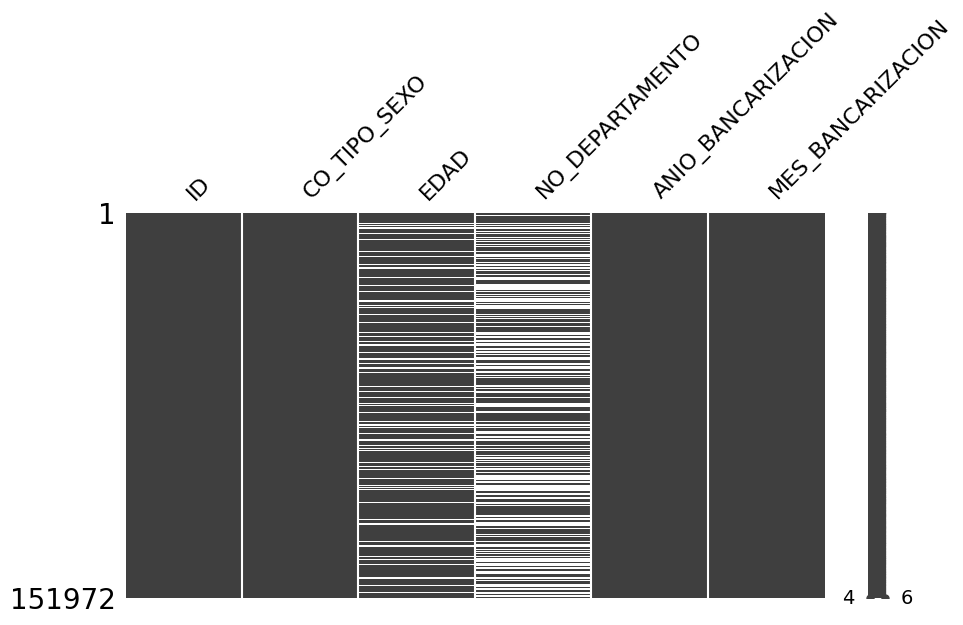

In [18]:
msno.matrix(df_customers, figsize=(10, 5))

# *JOIN*

In [19]:
df_join = df_customers.merge(
    df_balances_unirow, how='left', on='ID'
)

In [20]:
df_join['NO_DEPARTAMENTO'].value_counts(normalize=True)

LAMBAYEQUE      0.227646
AREQUIPA        0.092984
JUNIN           0.078265
CAJAMARCA       0.075917
ANCASH          0.063730
PASCO           0.061198
LA LIBERTAD     0.045141
TUMBES          0.041704
PIURA           0.038372
ICA             0.037060
PUNO            0.026408
HUANUCO         0.025109
CALLAO          0.024715
AYACUCHO        0.023968
HUANCAVELICA    0.023167
MADRE DE DIOS   0.017723
AMAZONAS        0.015952
TACNA           0.015939
SAN MARTIN      0.014863
UCAYALI         0.013932
LIMA            0.010246
APURIMAC        0.008842
LORETO          0.006533
CUSCO           0.005392
MOQUEGUA        0.005195
Name: NO_DEPARTAMENTO, dtype: float64

In [21]:
df_join['EDAD'].describe()

count   126566.000000
mean        46.586445
std         11.830842
min         19.000000
25%         38.000000
50%         45.000000
75%         55.000000
max        107.000000
Name: EDAD, dtype: float64

/tmp/ipykernel_23657/1546855181.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_join['EDAD'], shade=True)


<Axes: xlabel='EDAD', ylabel='Density'>

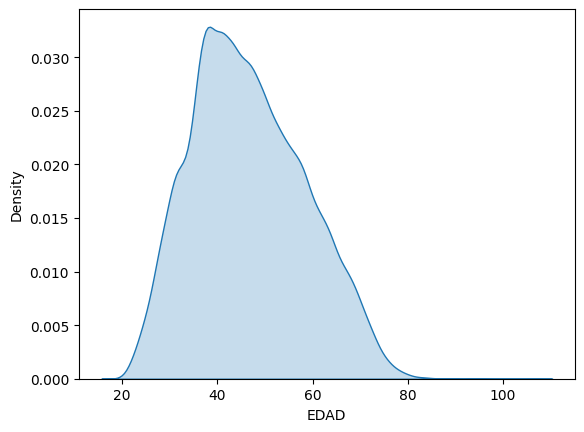

In [22]:
sns.kdeplot(df_join['EDAD'], shade=True)

In [23]:
df_join.isna().sum()

ID                                        0
CO_TIPO_SEXO                              0
EDAD                                  25406
NO_DEPARTAMENTO                       75744
ANIO_BANCARIZACION                        0
                                      ...  
VAR_SALDO_TOTAL-VENCIDO_1_median          0
VAR_SALDO_TOTAL-VENCIDO_MA3_mean          0
VAR_SALDO_TOTAL-VENCIDO_MA3_median        0
VAR_SALDO_TOTAL-VENCIDO_MA8_mean          0
VAR_SALDO_TOTAL-VENCIDO_MA8_median        0
Length: 140, dtype: int64

In [24]:
nc, cc = get_cols(df_join)
df_join[nc].std(numeric_only=True).reset_index().sort_values(by=0, ascending=False)

,index,0
98,SALDO_EMP_TOTAL_max,80173.564228
97,SALDO_EMP_TOTAL_last,70848.901986
100,SALDO_EMP_TOTAL_median,69892.524226
96,SALDO_EMP_TOTAL_mean,69015.638912
99,SALDO_EMP_TOTAL_min,60878.987456
...,...,...
59,CANT_EMP_DOL_NEG_first,0.027976
56,CANT_EMP_DOL_NEG_last,0.027020
55,CANT_EMP_DOL_NEG_median,0.026652
54,CANT_EMP_DOL_NEG_mean,0.025295


In [25]:
df_join.dtypes

ID                                      object
CO_TIPO_SEXO                          category
EDAD                                   float64
NO_DEPARTAMENTO                         object
ANIO_BANCARIZACION                       int64
                                        ...   
VAR_SALDO_TOTAL-VENCIDO_1_median       float64
VAR_SALDO_TOTAL-VENCIDO_MA3_mean       float64
VAR_SALDO_TOTAL-VENCIDO_MA3_median     float64
VAR_SALDO_TOTAL-VENCIDO_MA8_mean       float64
VAR_SALDO_TOTAL-VENCIDO_MA8_median     float64
Length: 140, dtype: object

In [26]:
from fancyimpute import KNN
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder

exclude_substr_list = ['CANT_', '_max', '_median', '_first', '_last', 'ID', ] + ['CO_TIPO_SEXO', 'ANIO_BANCARIZACION', 'MES_BANCARIZACION', 'EDAD']
cols = [col for col in df_join.columns if all([sub not in col for sub in exclude_substr_list])]

categorical_column = 'NO_DEPARTAMENTO'

label_encoder = LabelEncoder()
df_join[categorical_column] = label_encoder.fit_transform(df_join[categorical_column].astype(str))
display(df_join[categorical_column])

# Use KNNImputer to impute missing values
imputer = KNNImputer(n_neighbors=5)
df_join_imputed = pd.DataFrame(imputer.fit_transform(df_join[cols]), columns=cols)
display(df_join_imputed)
# Convert back to categorical type
df_join_imputed[categorical_column] = label_encoder.inverse_transform(df_join_imputed[categorical_column].astype(int))

df_join[categorical_column] = df_join_imputed[categorical_column].astype('category')

0          5
1         25
2         25
3         22
4         13
          ..
151967    25
151968    13
151969    25
151970    25
151971    23
Name: NO_DEPARTAMENTO, Length: 151972, dtype: int64

,NO_DEPARTAMENTO,SALDO_MED_EMP_mean,SALDO_MED_EMP_min,SALDO_PEQ_EMP_mean,SALDO_PEQ_EMP_min,SALDO_MIC_EMP_mean,SALDO_MIC_EMP_min,SALDO_CONS_REV_mean,SALDO_CONS_REV_min,SALDO_CONS_NO_REV_mean,SALDO_CONS_NO_REV_min,SALDO_HIPOT_mean,SALDO_HIPOT_min,SALDO_DOLA_NEG_mean,SALDO_DOLA_NEG_min,SALDO_DOLA_CONS_mean,SALDO_DOLA_CONS_min,SALDO_DOLA_HIPOT_mean,SALDO_DOLA_HIPOT_min,MAX_LINEA_DISP_U6M_mean,MAX_LINEA_DISP_U6M_min,SALDO_EMP_TOTAL_mean,SALDO_EMP_TOTAL_min,VAR_SALDO_EMP_TOTAL_1_mean,VAR_SALDO_EMP_TOTAL_MA3_mean,VAR_SALDO_EMP_TOTAL_MA8_mean,DIFF_SALDO_EMP_TOTAL_1_mean,DIFF_SALDO_EMP_TOTAL_MA3_mean,DIFF_SALDO_EMP_TOTAL_MA8_mean
0,5.000000,0.000000,0.000000,0.000000,0.000000,9130.239000,4771.377900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9130.239000,4771.377900,0.121810,0.080161,0.121810,566.690175,456.566400,566.690175
1,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7646.179489,4661.363000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,25.000000,0.000000,0.000000,0.000000,0.000000,7436.961000,2931.066000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7436.961000,2931.066000,0.235348,0.071841,0.235348,351.589612,-127.115100,351.589612
3,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,926.441389,608.987600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,13.000000,0.000000,0.000000,0.000000,0.000000,6357.610800,4643.673300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6357.610800,4643.673300,0.106046,0.087622,0.106046,471.972825,384.048450,471.972825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151967,25.000000,0.000000,0.000000,0.000000,0.000000,5141.456100,1538.943300,572.754000,89.489400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2970.000000,2970.000000,5141.456100,1538.943300,0.389221,0.297536,0.389221,220.152938,32.526450,220.152938
151968,13.000000,872905.616978,809560.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,872905.616978,809560.400000,-0.025527,-0.022779,-0.025527,-23442.102200,-20547.711556,-23442.102200
151969,25.000000,0.000000,0.000000,40528.934622,35181.403200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40528.934622,35181.403200,-0.034841,-0.032888,-0.034841,-1444.360050,-1355.497156,-1444.360050
151970,25.000000,0.000000,0.000000,0.000000,0.000000,6713.909100,4986.149400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6713.909100,4986.149400,0.044776,0.018767,0.044776,152.621212,28.265400,152.621212


In [27]:
df_join_imputed[categorical_column].value_counts(normalize=True)

nan             0.498408
LAMBAYEQUE      0.114186
AREQUIPA        0.046640
JUNIN           0.039257
CAJAMARCA       0.038079
ANCASH          0.031966
PASCO           0.030696
LA LIBERTAD     0.022642
TUMBES          0.020918
PIURA           0.019247
ICA             0.018589
PUNO            0.013246
HUANUCO         0.012594
CALLAO          0.012397
AYACUCHO        0.012022
HUANCAVELICA    0.011621
MADRE DE DIOS   0.008890
AMAZONAS        0.008001
TACNA           0.007995
SAN MARTIN      0.007455
UCAYALI         0.006988
LIMA            0.005139
APURIMAC        0.004435
LORETO          0.003277
CUSCO           0.002704
MOQUEGUA        0.002606
Name: NO_DEPARTAMENTO, dtype: float64

In [28]:
df_join['NO_DEPARTAMENTO'].value_counts(normalize=True)

nan             0.498408
LAMBAYEQUE      0.114186
AREQUIPA        0.046640
JUNIN           0.039257
CAJAMARCA       0.038079
ANCASH          0.031966
PASCO           0.030696
LA LIBERTAD     0.022642
TUMBES          0.020918
PIURA           0.019247
ICA             0.018589
PUNO            0.013246
HUANUCO         0.012594
CALLAO          0.012397
AYACUCHO        0.012022
HUANCAVELICA    0.011621
MADRE DE DIOS   0.008890
AMAZONAS        0.008001
TACNA           0.007995
SAN MARTIN      0.007455
UCAYALI         0.006988
LIMA            0.005139
APURIMAC        0.004435
LORETO          0.003277
CUSCO           0.002704
MOQUEGUA        0.002606
Name: NO_DEPARTAMENTO, dtype: float64

In [29]:
df_train = pd.read_csv('../data/raw/train.csv').merge(df_join, how='left', on='ID')
df_test = pd.read_csv('../data/raw/test.csv').merge(df_join, how='left', on='ID')

In [30]:
df_test.isna().sum()

ID                                        0
TARGET                                60789
CO_TIPO_SEXO                              0
EDAD                                  10113
NO_DEPARTAMENTO                           0
                                      ...  
VAR_SALDO_TOTAL-VENCIDO_1_median          0
VAR_SALDO_TOTAL-VENCIDO_MA3_mean          0
VAR_SALDO_TOTAL-VENCIDO_MA3_median        0
VAR_SALDO_TOTAL-VENCIDO_MA8_mean          0
VAR_SALDO_TOTAL-VENCIDO_MA8_median        0
Length: 141, dtype: int64

In [31]:
df_train.isna().sum()

ID                                        0
TARGET                                    0
CO_TIPO_SEXO                              0
EDAD                                  15293
NO_DEPARTAMENTO                           0
                                      ...  
VAR_SALDO_TOTAL-VENCIDO_1_median          0
VAR_SALDO_TOTAL-VENCIDO_MA3_mean          0
VAR_SALDO_TOTAL-VENCIDO_MA3_median        0
VAR_SALDO_TOTAL-VENCIDO_MA8_mean          0
VAR_SALDO_TOTAL-VENCIDO_MA8_median        0
Length: 141, dtype: int64

In [32]:
display(df_train['TARGET'].value_counts(normalize=True))
display(df_test['TARGET'].value_counts(normalize=True))

0   0.849994
1   0.150006
Name: TARGET, dtype: float64

Series([], Name: TARGET, dtype: float64)

In [33]:
df_train.to_parquet('../data/processed/train.gzip', compression='gzip')
df_test.to_parquet('../data/processed/test.gzip', compression='gzip')

In [34]:
df_test.isna().sum()

ID                                        0
TARGET                                60789
CO_TIPO_SEXO                              0
EDAD                                  10113
NO_DEPARTAMENTO                           0
                                      ...  
VAR_SALDO_TOTAL-VENCIDO_1_median          0
VAR_SALDO_TOTAL-VENCIDO_MA3_mean          0
VAR_SALDO_TOTAL-VENCIDO_MA3_median        0
VAR_SALDO_TOTAL-VENCIDO_MA8_mean          0
VAR_SALDO_TOTAL-VENCIDO_MA8_median        0
Length: 141, dtype: int64

In [35]:
df_train.isna().sum()

ID                                        0
TARGET                                    0
CO_TIPO_SEXO                              0
EDAD                                  15293
NO_DEPARTAMENTO                           0
                                      ...  
VAR_SALDO_TOTAL-VENCIDO_1_median          0
VAR_SALDO_TOTAL-VENCIDO_MA3_mean          0
VAR_SALDO_TOTAL-VENCIDO_MA3_median        0
VAR_SALDO_TOTAL-VENCIDO_MA8_mean          0
VAR_SALDO_TOTAL-VENCIDO_MA8_median        0
Length: 141, dtype: int64

In [36]:
df_train['ID'].isin(df_balances['ID']).value_counts()

True    91183
Name: ID, dtype: int64

In [37]:
df_test['ID'].isin(df_balances['ID']).value_counts()

True    60789
Name: ID, dtype: int64

In [38]:
df_train['ID'].isin(df_customers['ID']).value_counts()

True    91183
Name: ID, dtype: int64

In [39]:
df_test['ID'].isin(df_customers['ID']).value_counts()

True    60789
Name: ID, dtype: int64

In [40]:
df_train.dtypes

ID                                      object
TARGET                                   int64
CO_TIPO_SEXO                          category
EDAD                                   float64
NO_DEPARTAMENTO                       category
                                        ...   
VAR_SALDO_TOTAL-VENCIDO_1_median       float64
VAR_SALDO_TOTAL-VENCIDO_MA3_mean       float64
VAR_SALDO_TOTAL-VENCIDO_MA3_median     float64
VAR_SALDO_TOTAL-VENCIDO_MA8_mean       float64
VAR_SALDO_TOTAL-VENCIDO_MA8_median     float64
Length: 141, dtype: object